<a href="https://colab.research.google.com/github/devkhetan/ML-Internship/blob/master/ML_Internship_Project(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#reading Data in python
sample_data = pd.read_csv("data.csv")

In [6]:
#To display top 5 rows
sample_data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#To display bottom 5 rows
sample_data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [8]:
#Checking the Data Types 
sample_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
#Checking the shape of the Data
sample_data.shape

(11914, 16)

In [10]:
#Checking the null values in the Data
sample_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [12]:
sample_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [13]:
#Dropping the uneccessary Columns
sample_data = sample_data.drop(['Market Category' , 'Number of Doors' , 'Engine Fuel Type'] , axis = 1)

In [14]:
sample_data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [15]:
#Renaming the Columns
sample_data.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'MRP'},inplace = True)

In [16]:
sample_data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [18]:
duplicate_rows = sample_data[sample_data.duplicated()]
print(duplicate_rows)

         Make     Model  Year     HP  ...  MPG-H MPG-C Popularity    MRP
14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
18       Audi       100  1992  172.0  ...     24    17       3105   2000
20       Audi       100  1992  172.0  ...     24    17       3105   2000
24       Audi       100  1993  172.0  ...     24    17       3105   2000
25       Audi       100  1993  172.0  ...     24    17       3105   2000
...       ...       ...   ...    ...  ...    ...   ...        ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499

[792 rows x 13 columns]


In [19]:
sample_data.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
MRP               0
dtype: int64

In [20]:
#Removing Duplicates
ample_data = sample_data.drop_duplicates()
sample_data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [22]:
#Removing Null values and Missing Data
sample_data = sample_data.dropna()
sample_data.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
MRP              0
dtype: int64

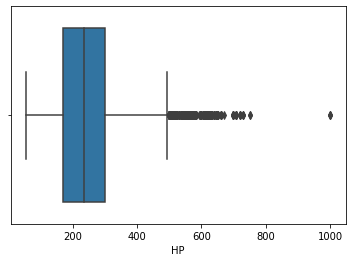

In [33]:
#Plotting Graphs of Data(Columns)
sns.boxplot(x=sample_data['HP'])

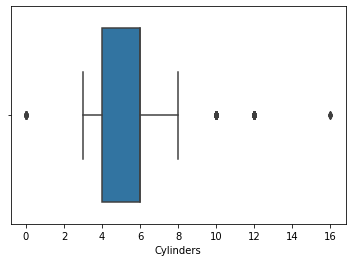

In [34]:
sns.boxplot(x=sample_data['Cylinders'])

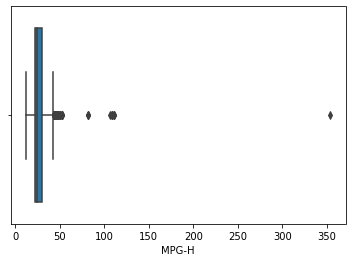

In [35]:
sns.boxplot(x=sample_data['MPG-H'])

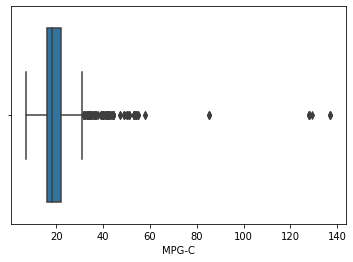

In [36]:
sns.boxplot(x=sample_data['MPG-C'])

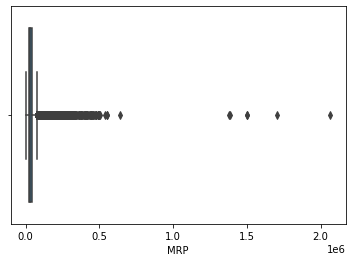

In [37]:
sns.boxplot(x=sample_data['MRP'])

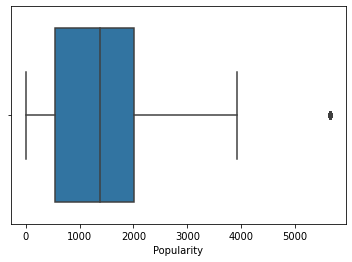

In [38]:
sns.boxplot(x=sample_data['Popularity'])

In [40]:
#Finding Z-Score
z = np.abs(stats.zscore(sample_data['Cylinders']))
print(z)


[0.18461512 0.18461512 0.18461512 ... 0.18461512 0.18461512 0.18461512]


In [41]:
#Using Threshold Value
threshold = 3
print(np.where(z > 3))

(array([  441,   442,   443,   444,   445,   446,   576,   577,   583,
         584,   585,   586,   587,   588,   589,   590,   591,   592,
         593,   594,   595,   596,   597,   598,   599,   600,   648,
         649,   650,   651,   659,   660,   661,   673,   674,   675,
         676,   677,   678,   679,   697,   734,   735,   736,   738,
        1093,  1579,  1580,  1581,  1582,  1583,  1584,  1585,  1586,
        1587,  1588,  1589,  1590,  1639,  1640,  1641,  2511,  2512,
        2515,  2518,  2519,  2521,  2678,  2679,  2680,  2681,  2682,
        2683,  2684,  2685,  2686,  2690,  2691,  2692,  2693,  2697,
        2702,  2703,  2704,  2706,  2707,  2708,  2709,  2710,  2713,
        2715,  2716,  2717,  2718,  2719,  3306,  3316,  3317,  3318,
        3319,  3320,  3321,  3322,  3323,  3324,  3325,  3326,  3327,
        3328,  3329,  3330,  3331,  3332,  3333,  3334,  3335,  3336,
        3337,  3338,  3339,  3340,  3341,  3342,  3343,  3344,  3345,
        3346,  3361

In [42]:
print(z[441])

3.5870063616913224


In [45]:
#Finding IQR
Q1 = sample_data.quantile(0.25)
Q2 = sample_data.quantile(0.75)
IQR = q2 - q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
MRP           21426.25
dtype: float64


In [54]:
#Removing Outliners
ample_data = sample_data[~((sample_data < (Q1 - 1.5 * IQR)) |(sample_data > (Q2 + 1.5 * IQR))).any(axis=1)]